# Predicting Hospital Length of Stay Using Machine Learning: A Data-Driven Approach Using SPARCS Inpatient Discharges
Team: Anna Baldzikowski, Allison Kramer, Parisha Patel & Samuel Buelvas

[Link to this notebook](https://colab.research.google.com/drive/1DyYronD1hpq8dn1YW5wC7vq2fmZ4Ty9q?usp=sharing)

## **Problem Statement**

Hospitals struggle to balance quality patient care with operational efficiency, and one critical factor influencing both patient outcomes and financial performance is the length of hospital stay (LOS). Extended or unpredictable stays can lead to increased costs and resource shortages, while shorter stays risk readmissions or incomplete recovery.
Using the Statewide Planning and Research Cooperative System (SPARCS) Hospital Inpatient Discharges dataset, this project aims to build a supervised machine learning model to predict hospital length of stay in days. This problem is framed as a supervised learning regression task, where the goal is to minimize prediction error for continuous LOS values. The results will help healthcare administrators and analysts forecast demand, allocate staff and resources, and identify trends that can improve financial planning.


##**Data Source**
Our data comes from the SPARCS, managed by the New York State Department of Health. SPARCS is a mandatory statewide reporting system that collects detailed information on all hospital inpatient discharges in New York. The specific dataset used is “Hospital Inpatient Discharges (SPARCS De-Identified): 2024”, published on HealthData.gov by health.data.ny.gov as part of the U.S. Department of Health and Human Services’ open data initiative. The dataset represents all inpatient discharges from New York hospitals during 2024 and was last updated on October 15, 2025.

**Link:** https://healthdata.gov/State/Hospital-Inpatient-Discharges-SPARCS-De-Identified/pqtp-sb82/about_data  


In [ ]:
#importing relevant libraries and the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

UnicodeTranslateError ="https://media.githubusercontent.com/media/patelparisha/Predicting-Hospital-Length-of-Stay-Using-Machine-Learning/refs/heads/main/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2024.csv"

sparcs = pd.read_csv(
    UnicodeTranslateError,
    low_memory=False,  # handles mixed data types better
    on_bad_lines='skip'  # skip any problematic rows instead of throwing an error
)


### **a. Cleaning Phase**

In [ ]:
sparcs.head(5)

,Health Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5957001.0,1139.0,WESTCHESTER MEDICAL CENTER,0-17,OOS,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,46814.00,6772.07
1,New York City,Queens,7003001.0,1628.0,FLUSHING HOSPITAL MEDICAL CENTER,0-17,113,M,White,Spanish/Hispanic,...,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,13490.00,15464.30
2,New York City,New York,7002054.0,1458.0,NEW YORK-PRESBYTERIAN HOSPITAL - NEW YORK WEIL...,70 or Older,100,M,White,Not Span/Hispanic,...,Moderate,Moderate,Medical,Medicare,Private Health Insurance,NaN,NaN,Y,49503.16,9324.77
3,New York City,New York,7002054.0,1464.0,NEW YORK-PRESBYTERIAN HOSPITAL - COLUMBIA PRES...,0-17,100,F,Other Race,Not Span/Hispanic,...,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,2700,Y,27827.66,7304.27
4,New York City,New York,7002032.0,1466.0,MOUNT SINAI WEST,18-29,100,F,Other Race,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicare,NaN,NaN,NaN,Y,32798.29,7948.10


In [ ]:
sparcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196737 entries, 0 to 2196736
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code                             object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [ ]:
sparcs.describe(include='all').T.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Health Service Area,2191442,8,New York City,996124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital County,2191442,57,New York,389375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operating Certificate Number,2191442.0,NaN,NaN,NaN,5087131.520291,2245914.005847,101000.0,2953000.0,5957001.0,7002032.0,7004010.0
Permanent Facility Id,2191442.0,NaN,NaN,NaN,1279.495557,1869.344069,1.0,541.0,1117.0,1456.0,15620.0
Facility Name,2196737,203,MOUNT SINAI HOSPITAL,53353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age Group,2196737,5,70 or Older,706970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,2154765,50,112,266231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,2196737,3,F,1195617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,2196737,4,White,1147354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethnicity,2196737,4,Not Span/Hispanic,1540538,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Deep dive into our target variable
sparcs['Length of Stay'].unique()

array(['1', '2', '3', '8', '9', '5', '4', '28', '6', '32', '48', '7',
       '22', '18', '13', '39', '11', '120+', '63', '114', '70', '80',
       '31', '12', '21', '26', '77', '74', '10', '15', '14', '88', '52',
       '24', '72', '23', '16', '17', '42', '20', '19', '25', '36', '51',
       '41', '29', '38', '37', '27', '119', '30', '35', '94', '83', '43',
       '33', '45', '34', '47', '71', '44', '57', '60', '61', '40', '68',
       '113', '58', '54', '53', '69', '78', '50', '91', '55', '90', '49',
       '65', '62', '64', '105', '89', '59', '102', '85', '46', '67',
       '104', '79', '99', '117', '66', '100', '93', '92', '109', '86',
       '111', '97', '95', '75', '96', '115', '73', '56', '116', '84',
       '76', '87', '101', '103', '81', '118', '82', '112', '110', '108',
       '98', '106', '107'], dtype=object)

In [ ]:
#The variable has some rows with "120+" we want to determine how much they are to make a decision
sparcs[pd.to_numeric(sparcs['Length of Stay'], errors='coerce').isna()].shape

(2404, 33)

In [ ]:
#Since only 2404 rows have the "120+" value we decided to drop them since it is not a substantial portion of the data.
sparcs=sparcs[sparcs['Length of Stay']!='120+']
sparcs['Length of Stay']=sparcs['Length of Stay'].astype('int')

In [ ]:
#Imputing missing values for procedures with "None" since those patients don't have a procedure
sparcs['CCSR Procedure Code'] = sparcs['CCSR Procedure Code'].fillna("None")

In [ ]:
# Cleaning the data: we notticed several variables had the "object" data type and adjusted them accordingly
sparcs['Health Service Area']=sparcs['Health Service Area'].astype('category')
sparcs['Hospital County']=sparcs['Hospital County'].astype('category')
sparcs['Facility Name']=sparcs['Facility Name'].astype('category')
sparcs['Age Group']=sparcs['Age Group'].astype('category')
sparcs['Zip Code']=sparcs['Zip Code'].astype('category') # Some missing "OOS" (65.078)
sparcs['Gender']=sparcs['Gender'].astype('category')  # M, F and U (385 rows)
sparcs['Race']=sparcs['Race'].astype('category')
sparcs['Ethnicity']=sparcs['Ethnicity'].astype('category')
sparcs['Type of Admission']=sparcs['Type of Admission'].astype('category')
sparcs['Patient Disposition']=sparcs['Patient Disposition'].astype('category')
sparcs['CCSR Diagnosis Code']=sparcs['CCSR Diagnosis Code'].astype('category')
sparcs['CCSR Diagnosis Description']=sparcs['CCSR Diagnosis Description'].astype('category')
sparcs['CCSR Procedure Code']=sparcs['CCSR Procedure Code'].astype('category')
sparcs['CCSR Procedure Description']=sparcs['CCSR Procedure Description'].astype('category')
sparcs['APR DRG Description']=sparcs['APR DRG Description'].astype('category')
sparcs['APR MDC Description']=sparcs['APR MDC Description'].astype('category')
sparcs['APR Severity of Illness Description']=sparcs['APR Severity of Illness Description'].astype('category')
sparcs['APR Risk of Mortality']=sparcs['APR Risk of Mortality'].astype('category')
sparcs['APR Medical Surgical Description']=sparcs['APR Medical Surgical Description'].astype('category')
sparcs['Payment Typology 1']=sparcs['Payment Typology 1'].astype('category')
sparcs['Payment Typology 2']=sparcs['Payment Typology 2'].astype('category')
sparcs['Payment Typology 3']=sparcs['Payment Typology 3'].astype('category')
sparcs['Emergency Department Indicator']=sparcs['Emergency Department Indicator'].astype('category')  # Y, N
sparcs['APR DRG Code']=sparcs['APR DRG Code'].astype('category')
sparcs['APR MDC Code']=sparcs['APR MDC Code'].astype('category')
sparcs['APR Severity of Illness Code']=sparcs['APR Severity of Illness Code'].astype('category')

In [ ]:
# There are 112 rows with missing values for Payment Typology 1, we decided to drop them
sparcs = sparcs.dropna(subset=['Payment Typology 1'])

In [ ]:
#Chacking the new data types
sparcs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2194106 entries, 0 to 2196736
Data columns (total 33 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   Health Service Area                  category
 1   Hospital County                      category
 2   Operating Certificate Number         float64 
 3   Permanent Facility Id                float64 
 4   Facility Name                        category
 5   Age Group                            category
 6   Zip Code                             category
 7   Gender                               category
 8   Race                                 category
 9   Ethnicity                            category
 10  Length of Stay                       int64   
 11  Type of Admission                    category
 12  Patient Disposition                  category
 13  Discharge Year                       int64   
 14  CCSR Diagnosis Code                  category
 15  CCSR Diagnosis Descr

In [ ]:
#Dropping the variables that we preliminary consider are not going to be relevant for the analysis
sparcs=sparcs.drop(['Operating Certificate Number','Zip Code','Discharge Year','Birth Weight','Payment Typology 2','Payment Typology 3','APR DRG Description','CCSR Diagnosis Description','CCSR Procedure Description','APR MDC Description','APR Severity of Illness Description','APR Medical Surgical Description'],axis=1)

In [ ]:
#Confirming the changes
sparcs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2194106 entries, 0 to 2196736
Data columns (total 21 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   Health Service Area             category
 1   Hospital County                 category
 2   Permanent Facility Id           float64 
 3   Facility Name                   category
 4   Age Group                       category
 5   Gender                          category
 6   Race                            category
 7   Ethnicity                       category
 8   Length of Stay                  int64   
 9   Type of Admission               category
 10  Patient Disposition             category
 11  CCSR Diagnosis Code             category
 12  CCSR Procedure Code             category
 13  APR DRG Code                    category
 14  APR MDC Code                    category
 15  APR Severity of Illness Code    category
 16  APR Risk of Mortality           category
 17  Payment Typol

In [ ]:
#Summary Statistics
sparcs.describe()

,Permanent Facility Id,Length of Stay,Total Charges,Total Costs
count,2.188817e+06,2.194106e+06,2.194106e+06,2.194106e+06
mean,1.279580e+03,5.685147e+00,8.828001e+04,2.566100e+04
std,1.869862e+03,7.980641e+00,1.601640e+05,4.592391e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.410000e+02,2.000000e+00,2.355449e+04,7.410500e+03
50%,1.117000e+03,3.000000e+00,4.718118e+04,1.409238e+04
75%,1.456000e+03,6.000000e+00,9.425518e+04,2.770872e+04
max,1.562000e+04,1.190000e+02,1.798104e+07,5.877199e+06


### **b. EDA**

Since `Length of Stay` is our target variable we want to have a deep dive on the variable distribution and potential relationship with the dataset features.

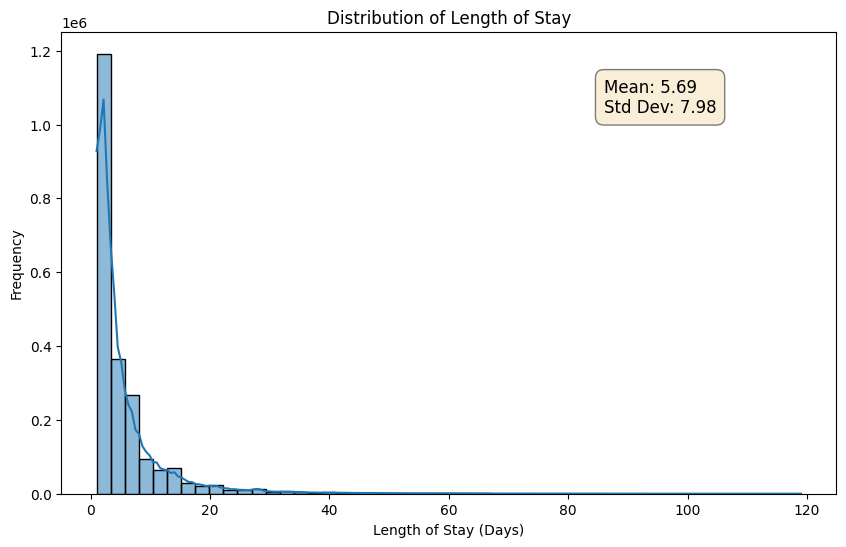

In [ ]:
# Making a histogram to visualize the target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(sparcs['Length of Stay'], bins=50, kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')

mean_los = sparcs['Length of Stay'].mean()
std_los = sparcs['Length of Stay'].std()

text_box = f'Mean: {mean_los:.2f}\nStd Dev: {std_los:.2f}'
plt.text(0.7, 0.9, text_box, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.show()

In [ ]:
#Checking the correlation matrix to identify features that must be included in the model
sparcs.corr(numeric_only=True)

,Permanent Facility Id,Length of Stay,Total Charges,Total Costs
Permanent Facility Id,1.000000,-0.005951,0.002697,-0.006461
Length of Stay,-0.005951,1.000000,0.656578,0.683022
Total Charges,0.002697,0.656578,1.000000,0.852490
Total Costs,-0.006461,0.683022,0.852490,1.000000


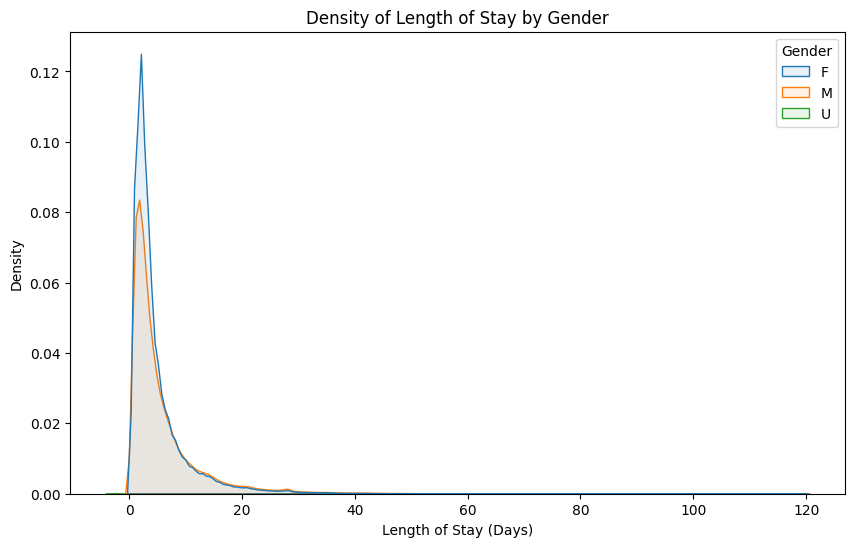

In [ ]:
#Comparing the density plots of length of stay per gender
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sparcs, x='Length of Stay', hue='Gender', fill=True, alpha=0.1)
plt.title('Density of Length of Stay by Gender')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Density')
plt.show()

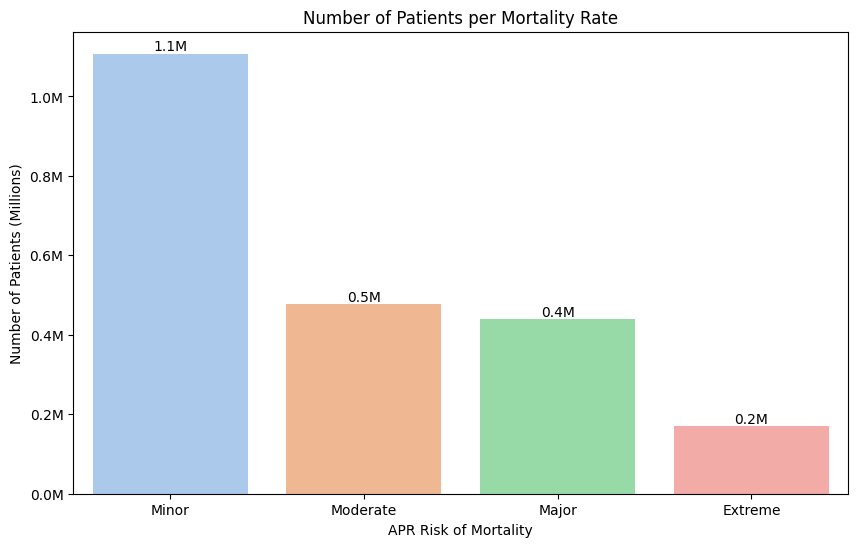

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create mortality_counts
mortality_counts = sparcs['APR Risk of Mortality'].value_counts().reset_index()
mortality_counts.columns = ['APR Risk of Mortality', 'Count']

# 2. Define custom order
order = ['Minor', 'Moderate', 'Major', 'Extreme']

# 3. Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='APR Risk of Mortality',
    y='Count',
    hue='APR Risk of Mortality',
    data=mortality_counts,
    order=order,
    hue_order=order,
    palette='pastel'
)

plt.title('Number of Patients per Mortality Rate')
plt.xlabel('APR Risk of Mortality')
plt.ylabel('Number of Patients (Millions)')

# Format y-axis in millions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Add labels
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'{p.get_height()/1e6:.1f}M',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5), textcoords='offset points'
    )

plt.show()

/tmp/ipython-input-2882908644.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_charges_costs = sparcs.groupby('Health Service Area')[['Total Charges', 'Total Costs']].median().reset_index()


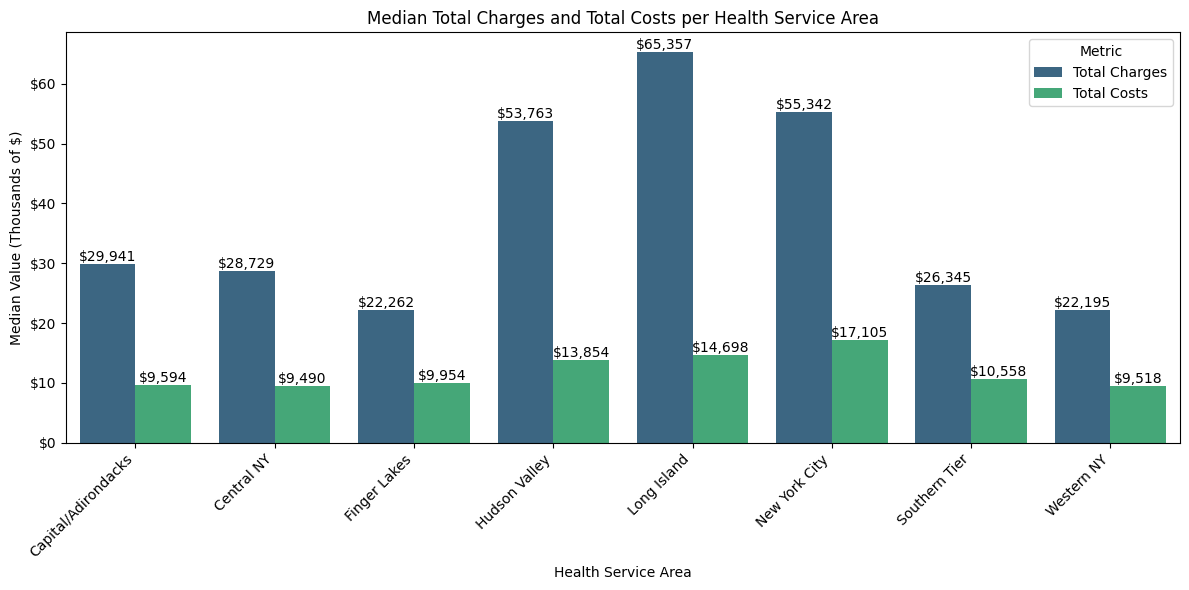

In [ ]:
# comparing the median charges and costs per health service area
median_charges_costs = sparcs.groupby('Health Service Area')[['Total Charges', 'Total Costs']].median().reset_index()

plt.figure(figsize=(12, 6))
melted_median = median_charges_costs.melt(id_vars='Health Service Area', var_name='Metric', value_name='Median Value')
ax = sns.barplot(x='Health Service Area', y='Median Value', hue='Metric', data=melted_median, palette='viridis')
plt.title('Median Total Charges and Total Costs per Health Service Area')
plt.xlabel('Health Service Area')
plt.ylabel('Median Value (Thousands of $)')
plt.xticks(rotation=45, ha='right')

# Format y-axis labels in thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e3:.0f}'))

# Add labels to the bars, formatted in thousands
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}')

plt.tight_layout()
plt.show()

In [ ]:
#Comparing the mean and median length of stay to detemine if that may be a driver for higher charges and costs
length_of_stay_stats = sparcs.groupby('Health Service Area')['Length of Stay'].agg(['mean', 'median']).reset_index()
length_of_stay_stats.columns = ['Health Service Area', 'Mean Length of Stay', 'Median Length of Stay']
display(length_of_stay_stats)

/tmp/ipython-input-2895396851.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_of_stay_stats = sparcs.groupby('Health Service Area')['Length of Stay'].agg(['mean', 'median']).reset_index()


,Health Service Area,Mean Length of Stay,Median Length of Stay
0,Capital/Adirondacks,5.403402,3.0
1,Central NY,5.389264,3.0
2,Finger Lakes,6.138755,3.0
3,Hudson Valley,5.874555,3.0
4,Long Island,5.144331,3.0
5,New York City,5.858525,3.0
6,Southern Tier,5.806637,3.0
7,Western NY,5.691998,3.0


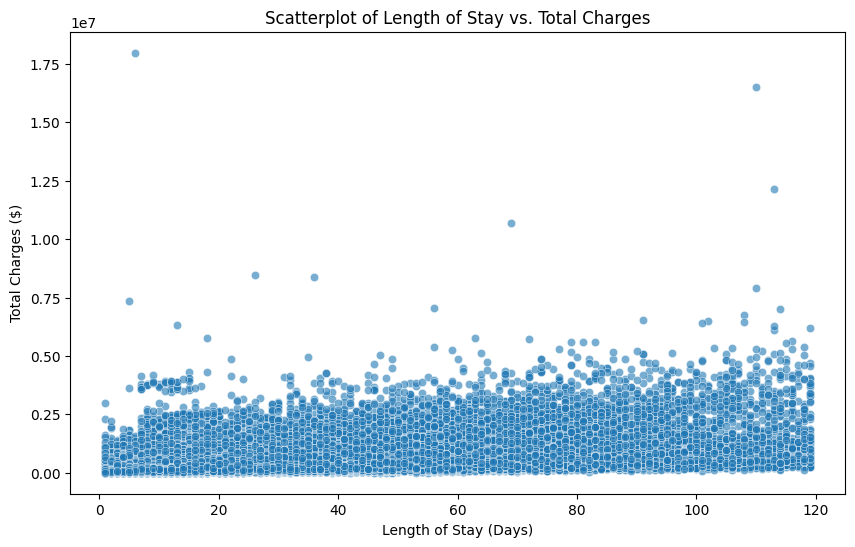

In [ ]:
# Make a scatterplot between length of stay and total charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sparcs, x='Length of Stay', y='Total Charges', alpha=0.6)
plt.title('Scatterplot of Length of Stay vs. Total Charges')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Total Charges ($)')
plt.show()

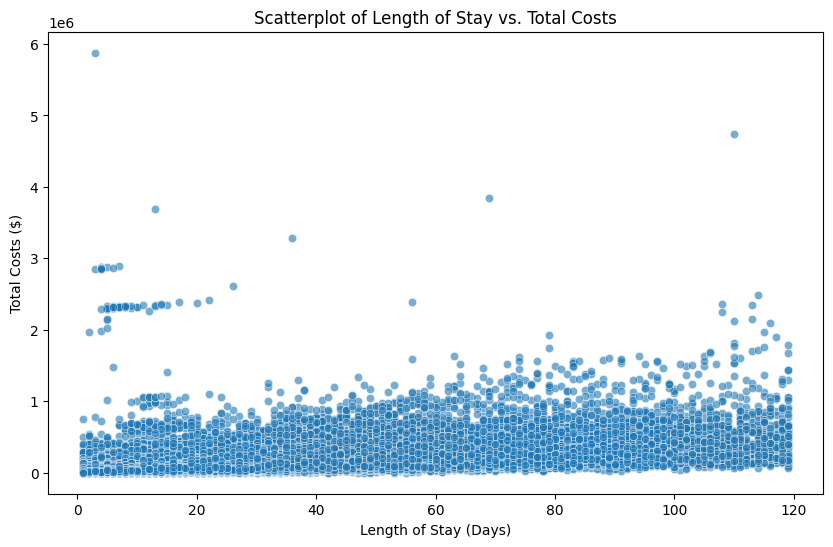

In [ ]:
# Make a scatterplot between length of stay and total costs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sparcs, x='Length of Stay', y='Total Costs', alpha=0.6)
plt.title('Scatterplot of Length of Stay vs. Total Costs')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Total Costs ($)')
plt.show()

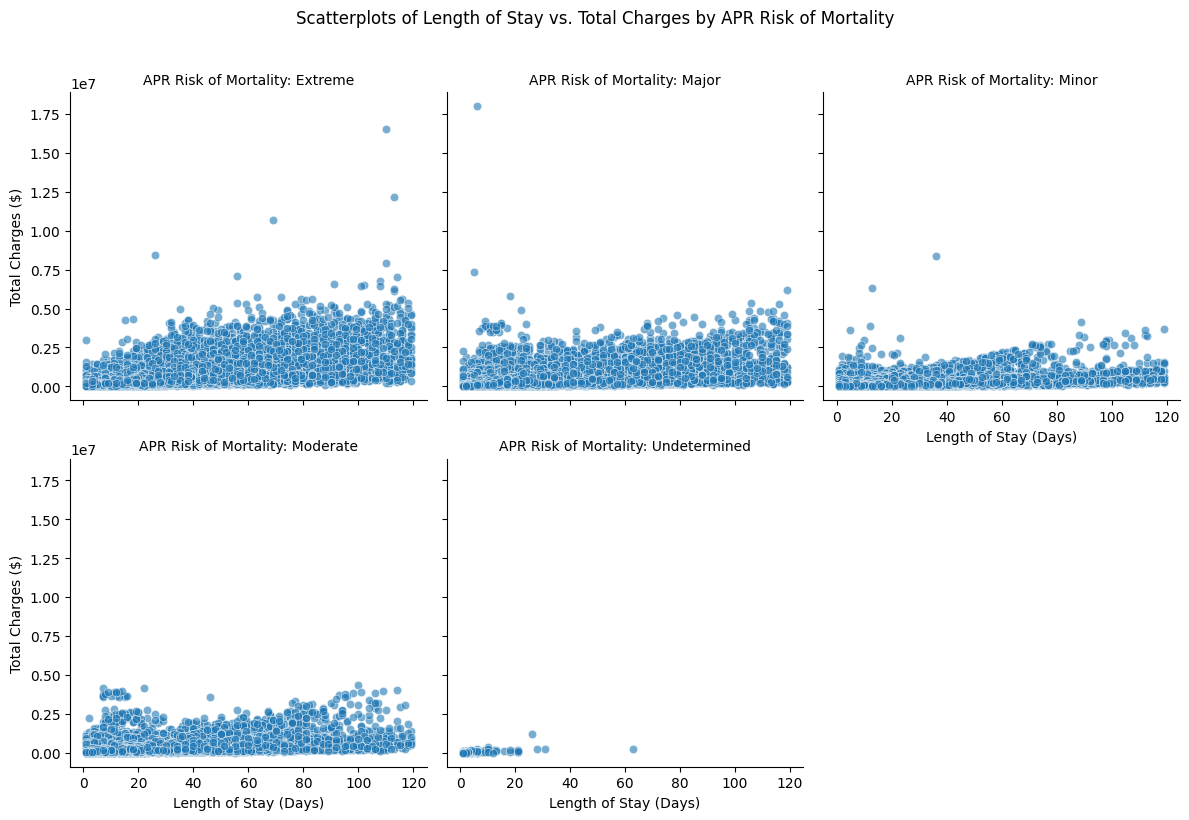

In [ ]:
# Scatterplots of length of stay and total charge differentiating by APR Risk of Mortality
g = sns.FacetGrid(sparcs, col="APR Risk of Mortality", col_wrap=3, height=4)
g.map(sns.scatterplot, "Length of Stay", "Total Charges", alpha=0.6)
g.fig.suptitle('Scatterplots of Length of Stay vs. Total Charges by APR Risk of Mortality', y=1.02)
g.set_titles("APR Risk of Mortality: {col_name}")
g.set_axis_labels("Length of Stay (Days)", "Total Charges ($)")
plt.tight_layout()
plt.show()

In [ ]:
# Focusing the analysis on medical facilityes inside the new york health service area
sparcs=sparcs[sparcs['Health Service Area']=='New York City']

In [ ]:
avg_los=sparcs['Length of Stay'].mean()
med_los=sparcs['Length of Stay'].median()
avg_cost=sparcs['Total Costs'].mean()
med_cost=sparcs['Total Costs'].median()
print(avg_los,med_los,avg_cost,med_cost)

5.858524511218327 3.0 31475.937594561812 17104.69


/tmp/ipython-input-2518803086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sparcs['average_cost_per_day']=sparcs['Total Costs']/sparcs['Length of Stay']


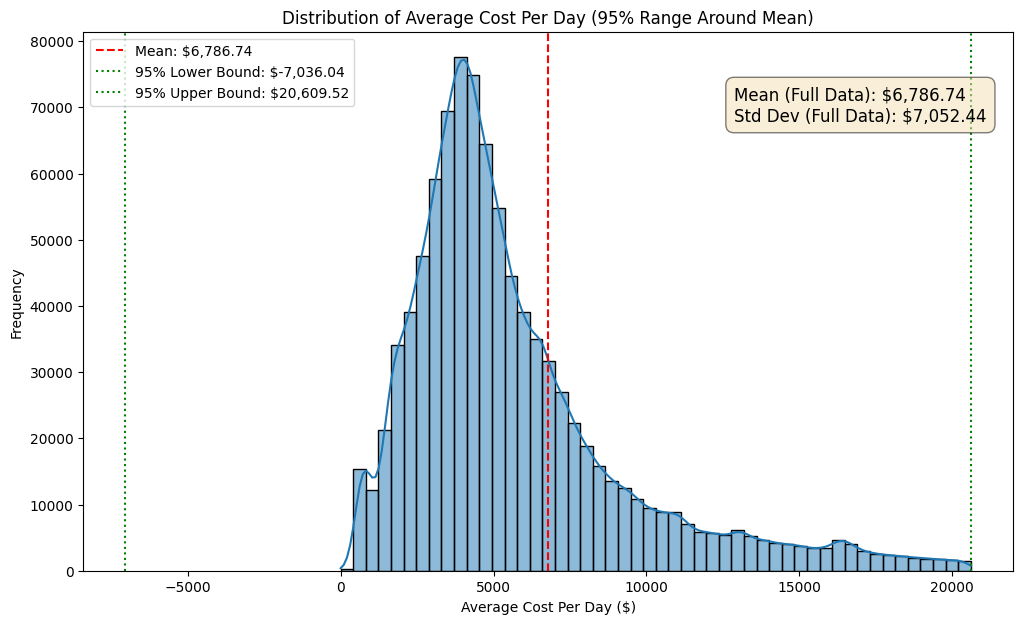

In [ ]:
# Calculate mean and standard deviation of 'average_cost_per_day' from the full dataset
sparcs['average_cost_per_day']=sparcs['Total Costs']/sparcs['Length of Stay']
mean_avg_cost_per_day_full = sparcs['average_cost_per_day'].mean()
std_avg_cost_per_day_full = sparcs['average_cost_per_day'].std()

# Define the 95% range around the mean
# For a normal distribution, ~95% of data falls within 2 standard deviations (more precisely 1.96)
lower_bound = mean_avg_cost_per_day_full - (1.96 * std_avg_cost_per_day_full)
upper_bound = mean_avg_cost_per_day_full + (1.96 * std_avg_cost_per_day_full)

# Filter the 'average_cost_per_day' data to only include values within the 95% range
filtered_avg_cost_per_day = sparcs[(sparcs['average_cost_per_day'] >= lower_bound) &
                                 (sparcs['average_cost_per_day'] <= upper_bound)]['average_cost_per_day']

# Create the histogram for the filtered data
plt.figure(figsize=(12, 7))
sns.histplot(filtered_avg_cost_per_day, bins=50, kde=True)
plt.title('Distribution of Average Cost Per Day (95% Range Around Mean)')
plt.xlabel('Average Cost Per Day ($)')
plt.ylabel('Frequency')

# Add text annotations for mean and standard deviation of the FULL dataset
text_box_content = f'Mean (Full Data): ${mean_avg_cost_per_day_full:,.2f}\nStd Dev (Full Data): ${std_avg_cost_per_day_full:,.2f}'
plt.text(0.7, 0.9, text_box_content, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# Add vertical lines for the mean and the 95% bounds
plt.axvline(mean_avg_cost_per_day_full, color='red', linestyle='--', label=f'Mean: ${mean_avg_cost_per_day_full:,.2f}')
plt.axvline(lower_bound, color='green', linestyle=':', label=f'95% Lower Bound: ${lower_bound:,.2f}')
plt.axvline(upper_bound, color='green', linestyle=':', label=f'95% Upper Bound: ${upper_bound:,.2f}')
plt.legend()

plt.show()

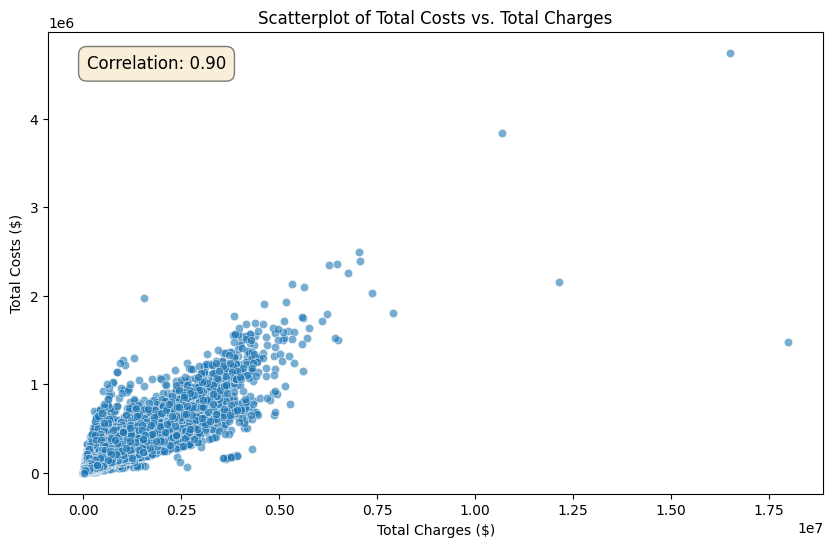

In [ ]:
# Calculate the Pearson correlation coefficient between 'Total Costs' and 'Total Charges'
correlation = sparcs['Total Costs'].corr(sparcs['Total Charges'])

# Make a scatterplot between Total Costs and Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sparcs, x='Total Charges', y='Total Costs', alpha=0.6)
plt.title('Scatterplot of Total Costs vs. Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Total Costs ($)')

# Add the correlation coefficient as a text annotation
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(0.05, 0.95, correlation_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.show()

## **c. Pre-Processing Pipeline**

We are going to be defining a pre processing pipeline to handle the data from our dataset. We are usign Standar Scaler and Simple Imputer (median) for numerical variables, and One Hot Encoder (ignoring unknown categories) and Simple Imputer (most frequent) for categorical variables. By doing that we will make sure that the existing data is correctly processed and also new records are correcly handled.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config

set_config(display='diagram')


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
])

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7db243d7de20>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7db241698170>)])

We splited data into traning and test using 25% of the data for testing (standard)

In [ ]:
# Splitting target and features
X=sparcs.drop(['Length of Stay','Total Charges','Total Costs','Permanent Facility Id','average_cost_per_day'],axis=1) #Dropping some variables that are not relevant for modeling
y=sparcs['Length of Stay']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248667 entries, 1885219 to 2089569
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Health Service Area             248667 non-null  category
 1   Hospital County                 248667 non-null  category
 2   Facility Name                   248667 non-null  category
 3   Age Group                       248667 non-null  category
 4   Gender                          248667 non-null  category
 5   Race                            248667 non-null  category
 6   Ethnicity                       248667 non-null  category
 7   Type of Admission               248667 non-null  category
 8   Patient Disposition             248667 non-null  category
 9   CCSR Diagnosis Code             248667 non-null  category
 10  CCSR Procedure Code             248667 non-null  category
 11  APR DRG Code                    248667 non-null  category
 12  

## **1. Modeling**

As an initial approach a set of 5 different models are going to be trained:
* Linear Regression
* Decision Tree Regressor
* Linear SVR
* Random Forest Regressor
* Light Gradient Boost

We are going to be comparing this simple models (not tuned) using RMSE, since it is more sensible to outliers,i.e. longer lengths of stay. From this initial models we are going to choose the best ones to be fine tuned.


### **1.1 Linear Regression**

In [ ]:
# Takes 60 secs to execute
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model=make_pipeline(prep_pipeline, LinearRegression())
lr_model.fit(X_train,y_train)

preds = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(mae,rmse,r2)

3.2381807107407394 6.473766720923026 0.4390399325329867


The initial result for a simple Linear Regression model is:
* MAE: 3.28
* RMSE: 6.47
* R2: 0.44

### **1.2 Decision Tree**

In [ ]:
# Takes 10 seconds
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dtr_model=make_pipeline(prep_pipeline, DecisionTreeRegressor(max_depth=5,random_state=42))
dtr_model.fit(X_train,y_train)

preds = dtr_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(mae,rmse,r2)

3.6402684056908146 7.204414712294504 0.3052712622730055


The initial result for a simple Decision Tree Regresor model is:
* MAE: 3.64
* RMSE: 7.20
* R2: 0.31

### **1.3 Linear SVR**

In [ ]:
# Takes 1 minute
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

svr_model=make_pipeline(prep_pipeline, LinearSVR())
svr_model.fit(X_train,y_train)

preds = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(mae,rmse,r2)

2.938768161318666 6.801891814677046 0.3807339157458969


The initial result for a simple Linear SVR model is:
* MAE: 2.93
* RMSE: 6.80
* R2: 0.38

### **1.4 Random Forest Regressor**

In [ ]:
# Takes 1 minute long
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rfr_model=make_pipeline(prep_pipeline, RandomForestRegressor(max_depth=2,random_state=42))
rfr_model.fit(X_train,y_train)

preds = rfr_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(mae,rmse,r2)

4.139301912003188 7.717340137062568 0.20282597548344883


The initial result for a simple Random Forest Regressor model is:
* MAE: 4.13
* RMSE: 7.72
* R2: 0.20

### **1.5 Light Gradient Boost**

In [ ]:
# light gradient boost
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning) #To avoid labeling warnings (don't affect the model)


lgb_model=make_pipeline(prep_pipeline, lgb.LGBMRegressor(n_estimators=500,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=-1) #To avoid excessive console output
)
lgb_model.fit(X_train,y_train)

preds = lgb_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(mae,rmse,r2)

2.9944407145026393 6.21860260199216 0.482389039986717


The initial result for a simple Light Gradient Boost model is:
* MAE: 2.99
* RMSE: 6.21
* R2: 0.48

## **2. Hyperparameter Tuning**

From the initial modeling exploration we decided to tune 4 models:
* Linear Regression - Using Rigde and Lasso versions
* Decision Tree Regressor
* Linear SVR
* Light Gradient Boost

So far the results in terms of MAE, RMSE and R-squared are more promising for the Linear SVR and Light Gradient Boost. Right now the idea of taking them for ensembling is being considered.


### **2.1 Ridge Regression**

Ordinary linear regression does not require hyperparameter tuning, so we used it as a baseline model. To compare performance and introduce regularization, we evaluated Ridge and Lasso regression and compared models using MAE, RMSE, and R².

* Shrinks all coefficients toward zero
* Retains all features
* Uses cross-validation to tune the regularization parameter alpha, improving generalization

In [ ]:
#Hyperparameter tunning [Takes 16 min]
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform

rid_model=make_pipeline(prep_pipeline, Ridge())


param_distributions = {
    "ridge__alpha": loguniform(0.01, 100)
}

random_search = RandomizedSearchCV(rid_model, param_distributions=param_distributions, n_iter=15, cv=3,
                                 scoring='neg_mean_absolute_error', random_state=42)

random_search.fit(X_train, y_train)
random_search.best_estimator_
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_ridge__alpha,mean_test_score
3,2.481041,-3.233157
8,2.537816,-3.233167
0,0.314891,-3.233367
14,0.053370,-3.233457
13,0.070690,-3.233467


In [ ]:
#tuned model
# Takes 1 minute
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rid_model=make_pipeline(prep_pipeline, Ridge(alpha=2.481041))
rid_model.fit(X_train,y_train)

preds = rid_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(mae,rmse,r2)

3.237765364096742 6.47233639064118 0.439287785002337


We are looking for lower MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error), scores and higher R^2. Lower MAE and RMSE indicate smaller prediction errors, while a higher R² shows the model explains more variation in length of stay.

The fine tuned Ridge Regression model improved the base scores:

* MAE: 3.238 → 3.237
* RMSE: 6.473 → 6.472
* R2: 0.439 → 0.439

The hyperparameters used from now on are `alpha`=2.481041


### **2.2 Lasso Regression**

We did a Lasso Regression with Cross-Validation
* Shrinks coefficients and sets some to zero
* Performs feature selection
* Tunes alpha via cross-validation




In [ ]:
#Hyperparameter tunning [Takes 55 min]
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform

las_model=make_pipeline(prep_pipeline, Lasso())


param_distributions = {
    "lasso__alpha": loguniform(0.01, 100)
}

random_search = RandomizedSearchCV(las_model, param_distributions=param_distributions, n_iter=15, cv=3,
                                 scoring='neg_mean_absolute_error', random_state=42)

random_search.fit(X_train, y_train)
random_search.best_estimator_
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_lasso__alpha,mean_test_score
10,0.012088,-3.448890
6,0.017074,-3.486041
5,0.042071,-3.602390
4,0.042080,-3.602422
14,0.053370,-3.624155


In [ ]:
#tuned model
# Takes 4 minutes
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lasso_model=make_pipeline(prep_pipeline, Lasso(alpha=0.012088))
lasso_model.fit(X_train,y_train)

preds = lasso_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(mae,rmse,r2)

3.455649544751821 6.953013344669673 0.3529110540303131


**Findings:** Ridge has performed better than Lasso, with a MAE of 3.237, a RMSE of 6.472, and a R2 of 0.439.

These are all more optimal than the values of Lasso (MAE of 3.456, RMSE of 6.953, R2 of 0.352. This is the case because we want R2 to be higher, and MAE and RMSE lower.

The hyperparameters for Ridge used from now on are `alpha`=2.481041


### **2.3 Decision Tree Regressor**

The baseline was a simple Decision Tree model with `max_depth`=5 (to avoid overfitting). Using random search we expect to find a better model by tuning the parameters `depth`, `min_samples_split` and `min_samples_leaf`.

In [ ]:
#Hyperparameter tunning [Takes 21 min]
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

dt_model=make_pipeline(prep_pipeline, DecisionTreeRegressor(random_state=42))


param_distributions = {
    "decisiontreeregressor__max_depth": randint(2, 25),            # depth between 2 and 50
    "decisiontreeregressor__min_samples_split": randint(2, 20),    # small values often best
    "decisiontreeregressor__min_samples_leaf": randint(1, 10)      # controls leaf size
}

random_search = RandomizedSearchCV(dt_model, param_distributions=param_distributions, n_iter=15, cv=3,
                                 scoring='neg_mean_absolute_error', random_state=42)

random_search.fit(X_train, y_train)
random_search.best_estimator_
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_decisiontreeregressor__max_depth,param_decisiontreeregressor__min_samples_leaf,param_decisiontreeregressor__min_samples_split,mean_test_score
8,23,9,18,-3.218888
12,22,9,8,-3.221738
5,23,5,3,-3.244444
14,19,9,3,-3.245777
2,20,7,12,-3.248334


In [ ]:
#New tuned model
# Takes 1 minute
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dtr_model=make_pipeline(prep_pipeline, DecisionTreeRegressor(max_depth=23,min_samples_leaf=9,min_samples_split=18,random_state=42))
dtr_model.fit(X_train,y_train)

preds = dtr_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(mae,rmse,r2)

3.222303853013517 6.676694831808278 0.4033207868175428


The fine tuned Decision Tree model improved the base scores:

* MAE: 3.64 → 3.22
* RMSE: 7.20 → 6.68
* R2: 0.31 → 0.40

The hyperparameters used from now on are `max_depth`=23, `min_samples_leaf`=9 and `min_samples_split`=18

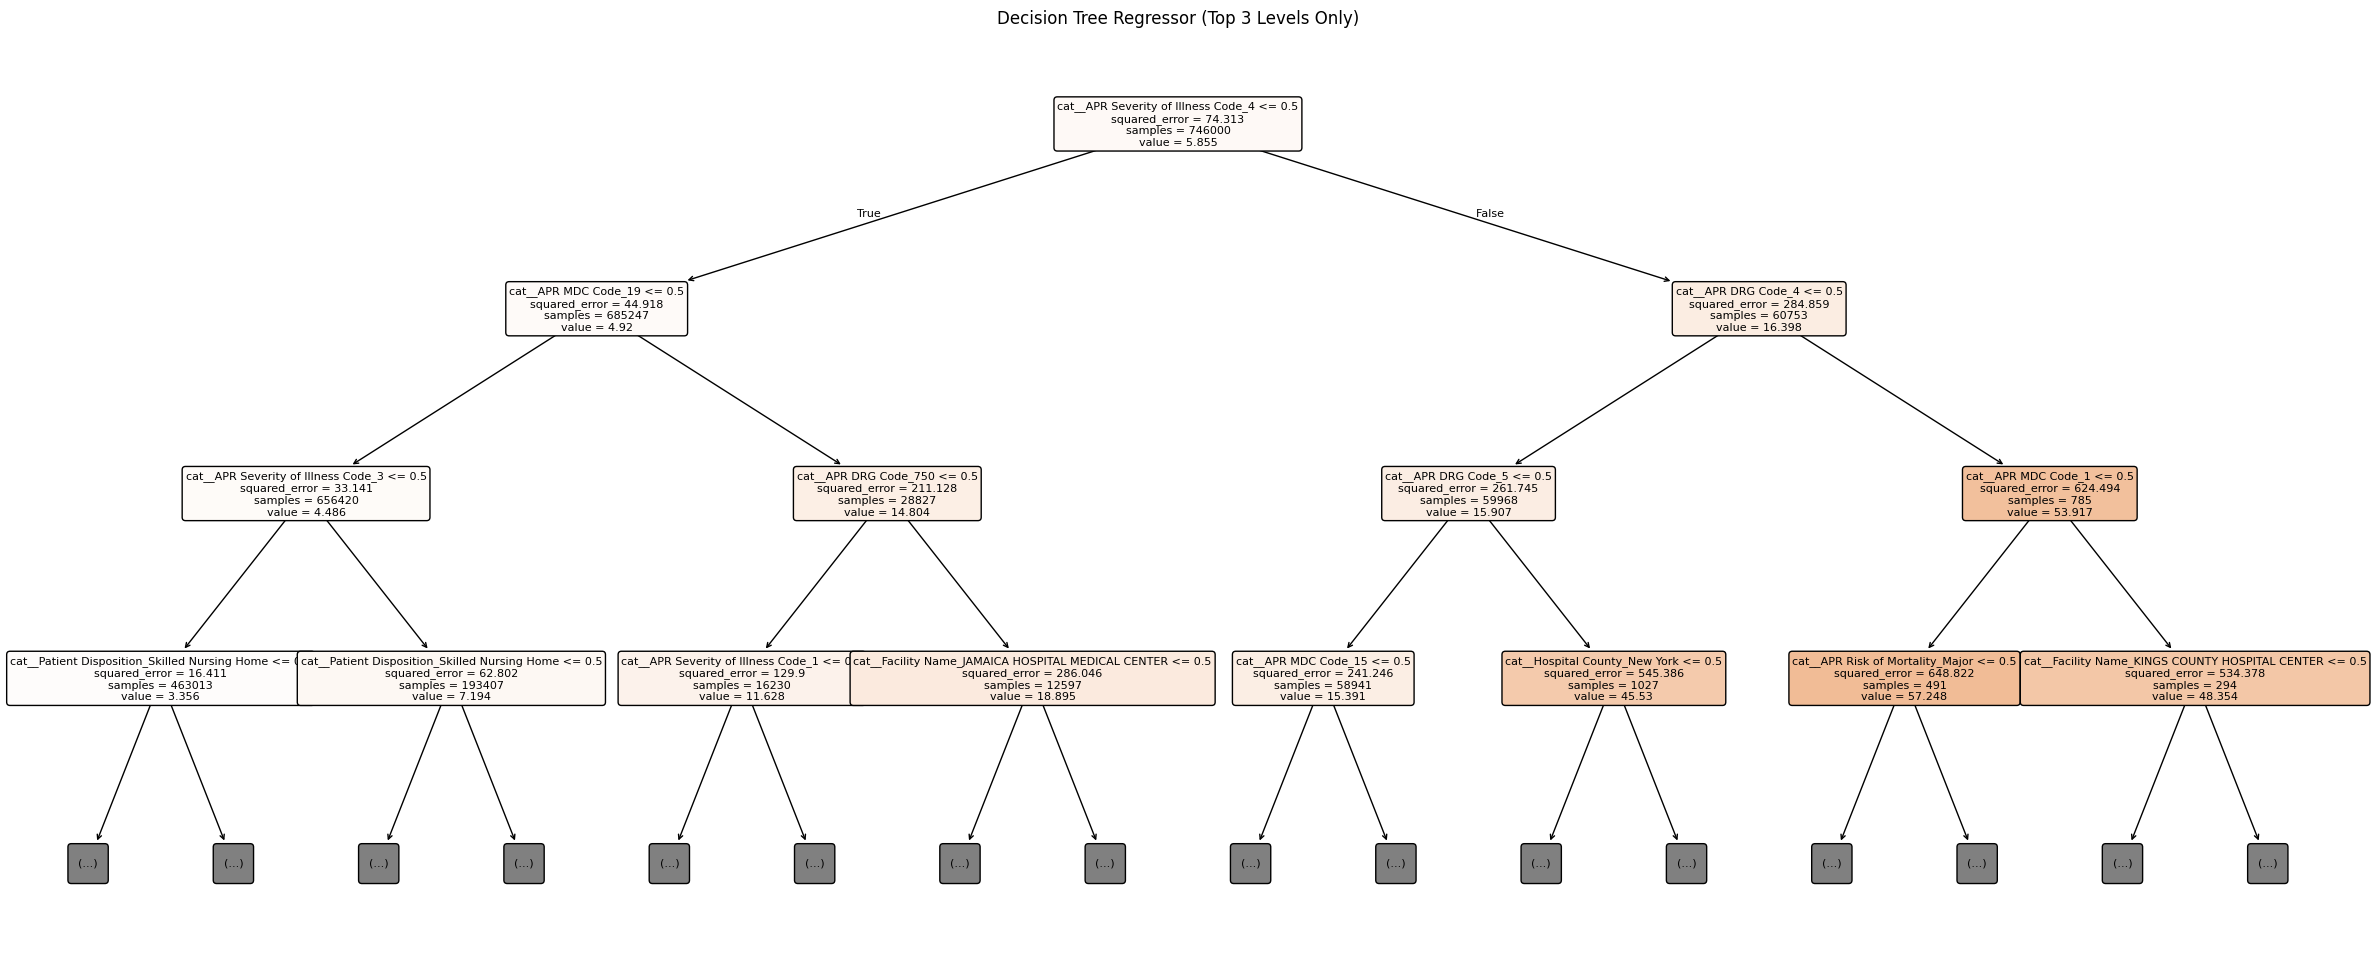

In [ ]:
# --- Visualize only the top layers of the tuned Decision Tree ---

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1. Extract the trained tree from pipeline
tree_model = dtr_model.named_steps["decisiontreeregressor"]

# 2. Get feature names safely
feature_names = []
try:
    feature_names = prep_pipeline.get_feature_names_out()
except:
    try:
        feature_names = dtr_model.named_steps["columntransformer"].get_feature_names_out()
    except:
        feature_names = [f"feature_{i}" for i in range(tree_model.n_features_)]

# 3. Plot only top 3 levels (root + 2 levels)
plt.figure(figsize=(30, 12))
plot_tree(
    tree_model,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3   # <<< limits visualization to top 3 layers
)
plt.title("Decision Tree Regressor (Top 3 Levels Only)")
plt.show()

### **2.4 Linear SVR**

The base model was as simple as possible, and for the fine tuning of the Linear SVR model we are taking into account the `C` and `epsilon` hyperparameters.


In [ ]:
#Hyperparameter tunning [Takes 38  min]
from sklearn.svm import LinearSVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform

svr_model=make_pipeline(prep_pipeline, LinearSVR())


param_distributions = {
    "linearsvr__C": loguniform(1e-2, 1e2),
    "linearsvr__epsilon": loguniform(1e-3, 1e0)
}

random_search = RandomizedSearchCV(svr_model, param_distributions=param_distributions, n_iter=15, cv=3,
                                 scoring='neg_mean_absolute_error', random_state=42)

random_search.fit(X_train, y_train)
random_search.best_estimator_
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_linearsvr__C,param_linearsvr__epsilon,mean_test_score
10,2.801635,0.002621,-2.934023
14,2.342385,0.001378,-2.934114
4,2.537816,0.133112,-2.934132
1,8.471801,0.062514,-2.934812
12,0.667237,0.226740,-2.938652


In [ ]:
# Tuned model [Takes 1 minutes]
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

svr_model=make_pipeline(prep_pipeline, LinearSVR(C=2.801635,epsilon=0.002621))
svr_model.fit(X_train,y_train)

preds = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(mae,rmse,r2)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


2.9392092744243006 6.801845295601165 0.38074238620918555


The fine tuned Linear SVR model slightly improved the base scores:

* MAE: 2.93 → 2.93
* RMSE: 6.80 → 6.79
* R2: 0.38 → 0.38

The hyperparameters used from now on are `C`=801635 and `epsilon`=0.002621

In [ ]:
#Exploring feature importance

import pandas as pd
import numpy as np
# 1. Get the FITTED preprocessor from the pipeline
fitted_preprocessor = svr_model.named_steps["columntransformer"]
# 2. Get feature names directly (NO need to inspect scaler or imputer)
feature_names = fitted_preprocessor.get_feature_names_out()
# 3. Extract LinearSVR coefficients
coefs = svr_model.named_steps["linearsvr"].coef_
# 4. Build feature importance dataframe
importance_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs,
    "abs_importance": np.abs(coefs)
}).sort_values("abs_importance", ascending=False)
importance_df.head(20)

,feature,coef,abs_importance
1127,cat__APR DRG Code_591,50.429430,50.429430
1128,cat__APR DRG Code_593,50.145152,50.145152
890,cat__APR DRG Code_4,34.588029,34.588029
1129,cat__APR DRG Code_602,30.899630,30.899630
1125,cat__APR DRG Code_588,28.792617,28.792617
891,cat__APR DRG Code_5,24.435908,24.435908
17,cat__Facility Name_HENRY J. CARTER SPECIALTY H...,23.042280,23.042280
889,cat__APR DRG Code_2,22.547435,22.547435
893,cat__APR DRG Code_7,21.415322,21.415322
776,cat__CCSR Procedure Code_MHT003,19.876851,19.876851


### **2.5 Light Gradient Boost**

In [ ]:
#Hyperparameter tunning [takes 55 minutes]
from sklearn.model_selection import RandomizedSearchCV

lgb_model=make_pipeline(prep_pipeline, lgb.LGBMRegressor(verbosity=-1) #To avoid excessive console output
)

param_distributions = {
    "lgbmregressor__num_leaves": np.arange(20, 150),
    "lgbmregressor__learning_rate": np.logspace(-3, -1, 50),
    "lgbmregressor__n_estimators": np.arange(200, 1500),
    "lgbmregressor__min_child_samples": np.arange(10, 80),
    "lgbmregressor__subsample": np.linspace(0.6, 1.0, 30),
    "lgbmregressor__colsample_bytree": np.linspace(0.6, 1.0, 30)
}

random_search = RandomizedSearchCV(lgb_model, param_distributions=param_distributions, n_iter=10, cv=3,
                                 scoring='neg_mean_absolute_error', random_state=42)

random_search.fit(X_train, y_train)
random_search.best_estimator_
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_lgbmregressor__subsample,param_lgbmregressor__num_leaves,param_lgbmregressor__n_estimators,param_lgbmregressor__min_child_samples,param_lgbmregressor__learning_rate,param_lgbmregressor__colsample_bytree,mean_test_score
2,0.889655,113,1061,26,0.051795,0.944828,-2.888002
0,1.000000,111,725,12,0.062506,0.931034,-2.898877
5,0.958621,62,1040,49,0.056899,0.862069,-2.902429
9,0.931034,103,800,25,0.029471,0.668966,-2.905708
4,0.668966,120,597,65,0.039069,0.931034,-2.907247


In [ ]:
# Tunned light gradient boost [takes 2 minutes]
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning) #To avoid labeling warnings (don't affect the model)


lgb_model=make_pipeline(prep_pipeline, lgb.LGBMRegressor(
    learning_rate=0.051795,
    subsample=0.889655,
    num_leaves=113,
    n_estimators=1061,
    min_child_samples=26,
    colsample_bytree=0.944828,
    random_state=42,
    verbosity=-1) #To avoid excessive console output
)
lgb_model.fit(X_train,y_train)

preds = lgb_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(mae,rmse,r2)

2.8828594781782986 6.09603193538216 0.5025925083054112


The fine tuned Light Gradient Boost model improved the base scores:

* MAE: 2.99 → 2.88
* RMSE: 6.22 → 6.09
* R2: 0.48 → 0.50

The hyperparameters used from now on are `learning_rate`=0.051795,  `subsample`=0.889655, `num_leaves`=113, `n_estimators`=1061, `min_child_samples`=26 and `colsample_bytree`=0.944828

## **3. Feature Selection**

To further improve the performance of the model we are going to explore feature selection for some of the tuned models

### Feature Importances

In [ ]:
import pandas as pd
import numpy as np

# 1. Extract feature names from prep_pipeline
def get_feature_names(ct, X):
    """
    Retrieves output feature names from a ColumnTransformer
    that includes numeric and categorical pipelines (with OneHotEncoder).
    """
    output_features = []

    for name, transformer, cols in ct.transformers_:
        if name == 'num':
            # numeric columns: names stay the same
            output_features.extend(cols)

        elif name == 'cat':
            # categorical columns: expand via OHE
            ohe = transformer.named_steps['cat_encoder']
            cat_feature_names = ohe.get_feature_names_out(cols)
            output_features.extend(cat_feature_names)

    return output_features


# 2. Extract names from pipeline
prep = lgb_model.named_steps['columntransformer']   # or ['prep_pipeline'] if named differently
feature_names = get_feature_names(prep, X_train)

# 3. Extract feature importances from the LightGBM model
lgbm = lgb_model.named_steps['lgbmregressor']
importances = lgbm.feature_importances_

# 4. Combine into sorted Series
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 5. Display top 30 for readability
feat_imp.head(30)

,0
APR Severity of Illness Code_4,3623
Gender_F,3495
Patient Disposition_Home or Self Care,2837
APR Risk of Mortality_Major,2546
APR Severity of Illness Code_3,2531
Patient Disposition_Skilled Nursing Home,2290
APR Risk of Mortality_Extreme,2245
Hospital County_New York,2201
Age Group_50-69,2194
Payment Typology 1_Medicare,2178


### Optimise SFS with Pre-filtering

In [ ]:
# ============================================================
# OPTIMIZED SFS WITH LGBM PREFILTERING (FINAL VERSION)
# ============================================================

from lightgbm import LGBMRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# ------------------------------------------------------------
# STEP 1 — 10% Sample
# ------------------------------------------------------------
sample_idx = sparcs.sample(frac=0.10, random_state=42).index
X_sample = X.loc[sample_idx]
y_sample = y.loc[sample_idx]

# Preprocess sample data
X_sample_prep = prep_pipeline.fit_transform(X_sample)

In [ ]:
# ------------------------------------------------------------
# STEP 2 — Pre-filter with LGBM importances (TOP 100 features)
# ------------------------------------------------------------
print("Training temporary LGBM for feature importances...")

temp_lgbm = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

temp_lgbm.fit(X_sample_prep, y_sample)

# Sort features by importance
importances = temp_lgbm.feature_importances_
idx_sorted = np.argsort(importances)[::-1]

top_k = 50  # Keep top 50 most important preprocessed features
selected_idx_prefilter = idx_sorted[:top_k]

print(f"Top {top_k} features selected from importance pre-filtering.")

X_sample_reduced = X_sample_prep[:, selected_idx_prefilter]


Training temporary LGBM for feature importances...
Top 50 features selected from importance pre-filtering.


In [ ]:
# ------------------------------------------------------------
# STEP 3 — Run SFS on reduced set [Takes 25 minutes]
# ------------------------------------------------------------
print("Running Sequential Forward Selection (SFS) on reduced feature set...")

lgb_sfs = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

sfs = SFS(
    lgb_sfs,
    k_features=10,
    forward=True,
    floating=False,
    scoring="neg_mean_squared_error",
    cv=2,
    n_jobs=-1,
    verbose=2
)

sfs = sfs.fit(X_sample_reduced, y_sample)

selected_sfs_idx = np.array(selected_idx_prefilter)[list(sfs.k_feature_idx_)]
print("Final SFS-selected feature indices (mapped to full preprocessed set):")
print(selected_sfs_idx)

Running Sequential Forward Selection (SFS) on reduced feature set...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished

[2025-12-05 04:24:18] Features: 1/10 -- score: -65.02682961692149[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:  1.4min finished

[2025-12-05 04:25:42] Features: 2/10 -- score: -61.08843543430169[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.6min finished

[2025-12-05 04:27:18] Features: 3/10 -- score: -58.226670648571826[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  47 out 

Final SFS-selected feature indices (mapped to full preprocessed set):
[1217  103   92   80 1216 1206  786 1202  857  856]


[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:  3.9min finished

[2025-12-05 04:48:23] Features: 10/10 -- score: -52.25149492221834

In [ ]:
# ------------------------------------------------------------
# STEP 4 — Apply selected features to FULL dataset
# ------------------------------------------------------------
X_full_prep = prep_pipeline.fit_transform(X)
X_full_selected = X_full_prep[:, selected_sfs_idx]

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_full_selected, y, test_size=0.2, random_state=42
)

In [ ]:
# ------------------------------------------------------------
# STEP 5 — Train final LGBM on selected features
# ------------------------------------------------------------
final_lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

final_lgbm.fit(X_train_fs, y_train_fs)
y_pred_fs = final_lgbm.predict(X_test_fs)


# ------------------------------------------------------------
# Evaluate performance
# ------------------------------------------------------------
mae = mean_absolute_error(y_test_fs, y_pred_fs)
rmse = mean_squared_error(y_test_fs, y_pred_fs)
r2 = r2_score(y_test_fs, y_pred_fs)

print("\n=======================================")
print(" Performance with Pre-Filtered SFS")
print("=======================================\n")
print(f"MAE:  {mae}")
print(f"RMSE: {rmse}")
print(f"R²:   {r2}")


 Performance with Pre-Filtered SFS

MAE:  4.359176714581169
RMSE: 68.39065550708105
R²:   0.08258765285422165


### RFE

In [ ]:
# 10% sample for feature selection
sample_idx = sparcs.sample(frac=0.10, random_state=42).index
X_sample = X.loc[sample_idx]
y_sample = y.loc[sample_idx]

# Preprocess sample data
X_sample_prep = prep_pipeline.fit_transform(X_sample)


In [ ]:
# Train temporary LGBM for feature importance
temp_lgbm = LGBMRegressor(
    n_estimators=300,  # reduced for speed
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)
temp_lgbm.fit(X_sample_prep, y_sample)

# Sort features by importance
importances = temp_lgbm.feature_importances_
idx_sorted = np.argsort(importances)[::-1]

top_k = 50  # keep top 50 features for SFS
selected_idx_prefilter = idx_sorted[:top_k]
X_sample_reduced = X_sample_prep[:, selected_idx_prefilter]

print(f"Top {top_k} features selected from pre-filtering.")

Top 50 features selected from pre-filtering.


In [ ]:
#[Takes 25 mins]
# SFS on reduced set
lgb_sfs = LGBMRegressor(
    n_estimators=200,  # reduced to speed up
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

sfs = SFS(
    lgb_sfs,
    k_features=10,
    forward=True,
    floating=False,
    scoring="neg_mean_squared_error",
    cv=2,
    n_jobs=-1,
    verbose=2
)

sfs = sfs.fit(X_sample_reduced, y_sample)

# Map selected features to full preprocessed feature indices
selected_sfs_idx = np.array(selected_idx_prefilter)[list(sfs.k_feature_idx_)]
print("Final SFS-selected feature indices (mapped to full preprocessed set):")
print(selected_sfs_idx)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished

[2025-12-05 06:05:44] Features: 1/10 -- score: -65.02682961692149[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:  1.5min finished

[2025-12-05 06:07:16] Features: 2/10 -- score: -61.08843543430169[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.7min finished

[2025-12-05 06:08:57] Features: 3/10 -- score: -58.226670648571826[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  47 out 

Final SFS-selected feature indices (mapped to full preprocessed set):
[1217  103   92   80 1216 1206  786 1202  857  856]


[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:  3.7min finished

[2025-12-05 06:30:13] Features: 10/10 -- score: -52.25149492221834

In [ ]:
# Preprocess full dataset and reduce to selected features
X_full_prep = prep_pipeline.fit_transform(X)
X_full_selected = X_full_prep[:, selected_sfs_idx]

# Train/test split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_full_selected, y, test_size=0.2, random_state=42
)

In [ ]:
final_lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

final_lgbm.fit(X_train_fs, y_train_fs)
y_pred_fs = final_lgbm.predict(X_test_fs)

In [ ]:
mae = mean_absolute_error(y_test_fs, y_pred_fs)
rmse = mean_squared_error(y_test_fs, y_pred_fs)
r2 = r2_score(y_test_fs, y_pred_fs)

print("\n=======================================")
print(" Performance with Pre-Filtered SFS")
print("=======================================\n")
print(f"MAE:  {mae}")
print(f"RMSE: {rmse}")
print(f"R²:   {r2}")


 Performance with Pre-Filtered SFS

MAE:  4.359176714581169
RMSE: 68.39065550708105
R²:   0.08258765285422165


## **4.Ensembling**

Since all the models have similar performance in terms of MAE and RMSE, we decided to combine their prediction properties into a single model. To do so


### **4.1 Voting**

In [ ]:
# Takes 4 min
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
import lightgbm as lgb

# preprocess the training data
tr_X = prep_pipeline.fit_transform(X_train)
tr_y = y_train

# preprocess the test data
t_X = prep_pipeline.transform(X_test)
t_y = y_test


voting_reg = VotingRegressor(
    estimators=[
        ('rid', Ridge(alpha=2.481041)),
        ('dt', DecisionTreeRegressor(max_depth=22,min_samples_leaf=9,min_samples_split=8,random_state=42)),
        ('svr', LinearSVR(C=2.801635,epsilon=0.002621)),
        ('lgb', lgb.LGBMRegressor(
    learning_rate=0.051795,
    subsample=0.889655,
    num_leaves=113,
    n_estimators=1061,
    min_child_samples=26,
    colsample_bytree=0.944828,
    random_state=42,
    verbosity=-1))
    ]
    # default
    # Default is hard voting, but you can use soft voting by passing voting = 'soft'. Each model's
    # vote can be further modified using 'weights' parameter (equal weight by default).
)

voting_reg.fit(tr_X, tr_y)  # fit each member model and keep it for application

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingRegressor(estimators=[('rid', Ridge(alpha=2.481041)),
                            ('dt',
                             DecisionTreeRegressor(max_depth=22,
                                                   min_samples_leaf=9,
                                                   min_samples_split=8,
                                                   random_state=42)),
                            ('svr', LinearSVR(C=2.801635, epsilon=0.002621)),
                            ('lgb',
                             LGBMRegressor(colsample_bytree=0.944828,
                                           learning_rate=0.051795,
                                           min_child_samples=26,
                                           n_estimators=1061, num_leaves=113,
                                           random_state=42, subsample=0.889655,
                                           verbosity=-1))])

In [ ]:
for name, reg in voting_reg.named_estimators_.items():
    print(f'R2 of {name} is {reg.score(t_X, t_y):.4f}')

print(f'Them voting give {voting_reg.score(t_X, t_y):.4f}')

R2 of rid is 0.4393
R2 of dt is 0.4035
R2 of svr is 0.3813


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


R2 of lgb is 0.5026


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Them voting give 0.4715


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

preds=voting_reg.predict(t_X)

mae = mean_absolute_error(t_y, preds)
rmse = np.sqrt(mean_squared_error(t_y, preds))
r2 = r2_score(t_y, preds)
print(mae,rmse,r2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


2.918704316332324 6.283495194910634 0.4715298889260039


### **4.2 Stacking**

In [ ]:
#Takes 23 minutes
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb

# preprocess the training data
tr_X = prep_pipeline.fit_transform(X_train)
tr_y = y_train

# preprocess the test data
t_X = prep_pipeline.transform(X_test)
t_y = y_test

estimators=[
        ('rid', Ridge(alpha=2.481041)),
        ('dt', DecisionTreeRegressor(max_depth=22,min_samples_leaf=9,min_samples_split=8,random_state=42)),
        ('svr', LinearSVR(C=2.801635,epsilon=0.002621)),
        ('lgb', lgb.LGBMRegressor(
    learning_rate=0.051795,
    subsample=0.889655,
    num_leaves=113,
    n_estimators=1061,
    min_child_samples=26,
    colsample_bytree=0.944828,
    random_state=42,
    verbosity=-1))
]

meta_model = LinearRegression()

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    passthrough=False
)

stack.fit(tr_X, tr_y)
pred_stack = stack.predict(t_X)


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [ ]:
for name, reg in stack.named_estimators_.items():
    print(f'R2 of {name} is {reg.score(t_X, t_y):.4f}')

print(f'Them Stacked give {stack.score(t_X, t_y):.4f}')

R2 of rid is 0.4393
R2 of dt is 0.4035
R2 of svr is 0.3820


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


R2 of lgb is 0.5026


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Them Stacked give 0.5028


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

preds=stack.predict(t_X)

mae = mean_absolute_error(t_y, preds)
rmse = np.sqrt(mean_squared_error(t_y, preds))
r2 = r2_score(t_y, preds)
print(mae,rmse,r2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


2.8880121469890767 6.095005552039959 0.5027599902970978


## **5. Results Summary**

The result for the fitting of the initial "simple" models was:

| Metric | Linear Regression | Decision Tree | Linear SVR | Random Forest | Light Gradient Boost |
|--------|-------------------|---------------|------------|---------------|---------------------|
|`MAE`| 3.238 | 3.640 | 2.938 | 4.139 | 2.994 |
|`RMSE`| 6.473 | 7.204 | 6.805 | 7.717 | 6.218 |
|`R-Squared`| 0.439 | 0.305 | 0.380 | 0.202 | 0.482|

After tuning the selected model the resuts are:
| Metric | Ridge Regression | Lasso Regression |Decision Tree | Linear SVR | Light Gradient Boost |
|--------|-------------------|---------------|------------|---------------|---------------------|
|`MAE`| 3.237 | 3.634 | 3.222 | 3.928 | 2.884 |
|`RMSE`| 6.472| 7.227 | 6.676 | 6.792 | 6.061 |
|`R-Squared`| 0.439 | 0.297 | 0.403 | 0.382 | 0.505|

‎

We tried to do feature selection to improve the prediction performance. Given the size of the dataset the feature selection process was extremely time expensive. To overcome that we made an exploration using a random 10% of the data set using the most promising model (LGB) but the results, MAE-RMSE-R2, were considerably worst than the base model (all features). For that reason we decided to use all the features and combine the predictive characteristics of the different tuned models by conducting an ensembling.

‎

We compared between Voting Regression and Staking Regression and this were the results:

| Metric | Voting Regression | Stacking Regression |
|--------|-------------------|---------------------|
|`MAE`| 2.918 | 2.888 |
|`RMSE`| 6.283 | 6.095 |
|`R-Squared`| 0.471 | 0.502 |

‎

Our final model, the one to deploy, is the Stacking Regression, built using a Ridge Regression, a Decision Tree, a Linear SVR and a Light Gradient Boost, blended using a Linear Regression and providing a forecasting accuracy that we want to leverage from a business perspective.

‎

**Data Insights and Business Opportunities**

*For New York City Area*

* The average cost per patient is \$31.4K and the median is \$17.1K. The length of stay is skewed, suggesting that there are "typical patients" those near the median, and "long stay patients" those that compose the long tail.

* The MAE and RMSE metrics may account for those two types of patients, the MAE is less sensitive to outliers and frames the length of stay of a "typical patient" within a week. The RMSE is sensitive to outliers and provides a more accurate expected value for "long stay patients" framing their LOS between 2 weeks.

## **6. AI Usage Disclosure**

In this project we used generative AI, specifically ChatGPT 4-5, as a tool to support us in the following tasks:

* **Code debugging:** working on parallel in different notebooks sometimes made harded to join different code blocks into a single document, and when error in variables refferencing of data types occured we used ChatGPT to help us identify and correct the error.


* **Model Understanding:** as we were fitting the models and tuning them some questions arise and we decided solve them with ChatGPT. We asked questions regarding the interpretation of some results in a certain model, how different hyperparameters may change the results from a model, and subsequently, deciding which to include while understanding its funcion in the model fitting, and also we asked regarding limitations that we faced when trying to run a certain model that would take to long because of the size of our dataset.


* **Support Graph Creation:** when the initial ideas on what to explore from the data set, specially focusing on the target variable relationship with other features, we developed some graphs to visually explore the data. For the final graphs we asked ChatGPT how to include some labels inside the graphs, change some colors and format axes.


* **Proofreading:** as the final notebook and slides were being built we used ChatGPT to proofread (specially looking for typos or style errors) some of our text.


* **Image Generation:** to represent our team as part of the staff of a NY medical center we used Gemini 2.0 to create a cartoon picture of it.
